In [1]:
import requests
import json
import pandas as pd

search_query = 'war'
number_of_results = 11
endpoint = 'search/page'
base_url = 'https://en.wikipedia.org/w/rest.php/v1/'

# See https://www.mediawiki.org/wiki/API:REST_API#Client_identification
headers = {'User-Agent': 'JiaJian/0.1 (jiajiangan01@gmail.com)'}

url = base_url + endpoint
response = requests.get(url, headers=headers, params={'q': search_query, 'limit': number_of_results})
response = json.loads(response.text)

df_wiki_search = pd.json_normalize(response['pages'])


In [2]:

df_wiki_links = pd.DataFrame()
for i in df_wiki_search['title']:
    S = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    PARAMS = {
        "action": "query",
	    "format": "json",
	    "prop": "links",
	    "titles": "War",
	    "formatversion": "2",
	    "pllimit": "50",
	    "pldir": "ascending"
    }
        #pllimit=50&pldir=ascending because the maximum is 50 and ascending
        #why so many links? because "Now, for each page in df_wiki_search, retrieve *all* links that exist on that page."

    R = S.get(url=URL, params=PARAMS)
    DATA = R.json()

    PAGES = DATA["query"]["pages"]

    individual_page_link = pd.DataFrame(PAGES[0]["links"])
    individual_page_link.drop(columns=["ns"], inplace=True)
    individual_page_link.rename(columns={"title": "link_title"}, inplace=True)
    individual_page_link["link_url"] = "https://en.wikipedia.org/wiki/" + individual_page_link["link_title"]
    individual_page_link["page_url"] = "https://en.wikipedia.org/wiki/" + i
    df_wiki_links = pd.concat([df_wiki_links, individual_page_link], ignore_index=True)

df_wiki_links.drop_duplicates(inplace=True)
df_wiki_links





,link_title,link_url,page_url
0,A History of Warfare,https://en.wikipedia.org/wiki/A History of War...,https://en.wikipedia.org/wiki/War
1,Adolf Hitler,https://en.wikipedia.org/wiki/Adolf Hitler,https://en.wikipedia.org/wiki/War
2,Aerial bomb,https://en.wikipedia.org/wiki/Aerial bomb,https://en.wikipedia.org/wiki/War
3,Aerial warfare,https://en.wikipedia.org/wiki/Aerial warfare,https://en.wikipedia.org/wiki/War
4,Air Force,https://en.wikipedia.org/wiki/Air Force,https://en.wikipedia.org/wiki/War
...,...,...,...
545,Auxiliary ship,https://en.wikipedia.org/wiki/Auxiliary ship,https://en.wikipedia.org/wiki/Six-Day War
546,BRICS,https://en.wikipedia.org/wiki/BRICS,https://en.wikipedia.org/wiki/Six-Day War
547,Balance of power (international relations),https://en.wikipedia.org/wiki/Balance of power...,https://en.wikipedia.org/wiki/Six-Day War
548,Barrage (artillery),https://en.wikipedia.org/wiki/Barrage (artillery),https://en.wikipedia.org/wiki/Six-Day War


In [3]:
individual_page_country_count = pd.DataFrame()
for x in df_wiki_links['link_title']:
    # Define the search query and API URL
    search_query = x  # change this to your desired keyword
    api_url = "https://en.wikipedia.org/w/api.php"

    # Define the API parameters for the search query
    params = {"action": "query","format": "json","prop": "extracts","titles": search_query,"exsectionformat": "wiki","explaintext": "","utf8": "","formatversion": "2"}

    # Send the API request and retrieve the page content
    response = requests.get(api_url, params=params)
    data = response.json()
  

    # Get the page content from the API response
    page_content = data["query"]["pages"][0]["extract"]


    # Count the number of occurrences of US in the page content
    word_count_1 = page_content.count("US") 
    word_count_2 = page_content.count("United States")
    word_count_3 = page_content.count("USA")
    word_count_4 = page_content.count("U.S.")
    word_count_US = word_count_1 + word_count_2 + word_count_3 + word_count_4

    # Count the number of occurrences of UK in the page content
    word_count_1 = page_content.count("UK")
    word_count_2 = page_content.count("United Kingdom")
    word_count_3 = page_content.count("U.K.")
    word_count_UK = word_count_1 + word_count_2 + word_count_3

    # Count the number of occurrences of Germany in the page content
    word_count_1 = page_content.count("Germany")
    word_count_2 = page_content.count("Nazis")
    word_count_3 = page_content.count("Nazi")
    word_count_4 = page_content.count("Nazi Germany")
    word_count_5 = page_content.count("Third Reich")
    word_count_Germany = word_count_1 + word_count_2 + word_count_3 + word_count_4 + word_count_5

    # Count the number of occurrences of France in the page content
    word_count_1 = page_content.count("France")
    word_count_France = word_count_1

    # Count the number of occurrences of Japan in the page content
    word_count_1 = page_content.count("Japan")
    word_count_Japan = word_count_1

    # Count the number of occurrences of Italy in the page content
    word_count_1 = page_content.count("Italy")
    word_count_Italy = word_count_1

    # Count the number of occurrences of Canada in the page content
    word_count_1 = page_content.count("Canada")
    word_count_Canada = word_count_1

    # Count the number of occurrences of Nigeria in the page content
    word_count_1 = page_content.count("Nigeria")
    word_count_Nigeria = word_count_1

    # Count the number of occurrences of China in the page content
    word_count_1 = page_content.count("China")
    word_count_2 = page_content.count("People's Republic of China")
    word_count_3 = page_content.count("PRC")
    word_count_China = word_count_1 + word_count_2 + word_count_3

    # Count the number of occurrences of Russia in the page content
    word_count_1 = page_content.count("Russia")
    word_count_2 = page_content.count("Russian Federation")
    word_count_Russia = word_count_1 + word_count_2

    # Count the number of occurrences of India in the page content
    word_count_1 = page_content.count("India")
    word_count_India = word_count_1

    # Count the number of occurrences of Iran in the page content
    word_count_1 = page_content.count("Iran")
    word_count_Iran = word_count_1

    # Count the number of occurrences of North Korea in the page content
    word_count_1 = page_content.count("North Korea")
    word_count_North_Korea = word_count_1

    individual_page_country_count = pd.concat([individual_page_country_count, pd.DataFrame({"link_url": x, "US": word_count_US, "UK": word_count_UK, "Germany": word_count_Germany, "France": word_count_France, "Japan": word_count_Japan, "Italy": word_count_Italy, "Canada": word_count_Canada, "Nigeria": word_count_Nigeria, "China": word_count_China, "Russia": word_count_Russia, "India": word_count_India, "Iran": word_count_Iran, "North Korea": word_count_North_Korea}, index=[0])], ignore_index=True)

individual_page_country_count
#df_wiki_links = pd.merge(df_wiki_links, individual_page_country_count, on="link_url", how="left")
#df_wiki_links = pd.merge(df_wiki_links, individual_page_country_count, on="link_url", how="left", suffixes=("_left", "_right"))
#df_wiki_links

,link_url,US,UK,Germany,France,Japan,Italy,Canada,Nigeria,China,Russia,India,Iran,North Korea
0,A History of Warfare,0,0,0,0,2,0,0,0,0,0,0,0,0
1,Adolf Hitler,7,1,143,14,9,7,0,0,3,2,0,0,0
2,Aerial bomb,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Aerial warfare,3,0,0,0,0,0,0,0,1,0,1,0,0
4,Air Force,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Auxiliary ship,6,0,0,0,0,0,0,0,0,0,0,0,0
546,BRICS,18,0,0,0,0,0,0,1,24,25,19,4,0
547,Balance of power (international relations),57,2,4,7,0,2,0,0,4,6,1,2,1
548,Barrage (artillery),5,0,0,0,0,1,0,0,0,1,0,0,0


In [4]:
#ill just use concat because merge is giving me a headache
individual_page_country_count.rename(columns={'link_url': 'link_title'}, inplace=True)
merged_df = pd.concat([df_wiki_links, individual_page_country_count], axis=1)
df_wiki_links = merged_df
totalus = merged_df['US'].sum()
totaluk = merged_df['UK'].sum()
totalgermany = merged_df['Germany'].sum()
totalfrance = merged_df['France'].sum()
totaljapan = merged_df['Japan'].sum()
totalitaly = merged_df['Italy'].sum()
totalcanada = merged_df['Canada'].sum()
totalnigeria = merged_df['Nigeria'].sum()
totalchina = merged_df['China'].sum()
totalrussia = merged_df['Russia'].sum()
totalindia = merged_df['India'].sum()
totaliran = merged_df['Iran'].sum()
totalnorthkorea = merged_df['North Korea'].sum()


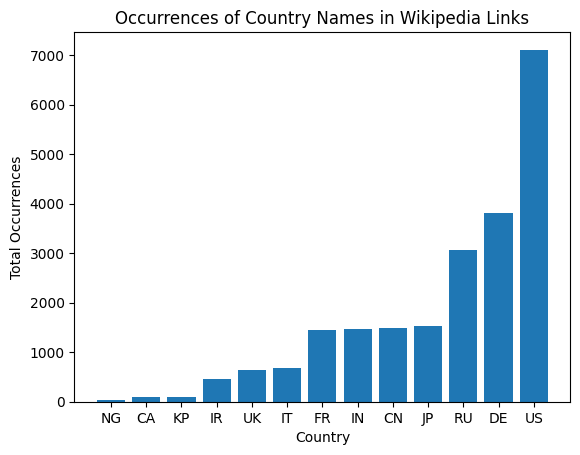

In [5]:
import matplotlib.pyplot as plt

# Create a dictionary of the total counts for each country
totals = {
    'US': totalus,
    'UK': totaluk,
    'DE': totalgermany,
    'FR': totalfrance,
    'JP': totaljapan,
    'IT': totalitaly,
    'CA': totalcanada,
    'NG': totalnigeria,
    'CN': totalchina,
    'RU': totalrussia,
    'IN': totalindia,
    'IR': totaliran,
    'KP': totalnorthkorea
}

# Sort the totals dictionary by value in ascending order
sorted_totals = {k: v for k, v in sorted(totals.items(), key=lambda item: item[1])}

# Create a bar plot with the sorted totals
plt.bar(sorted_totals.keys(), sorted_totals.values())

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Total Occurrences')
plt.title('Occurrences of Country Names in Wikipedia Links')

# Show the plot
plt.show()


In [6]:
#soft requirement 1: trying to see if other wikimedia page exists for each link, if it does, add it to the dataframe, and if not add a null value
test= []
a = []
def remove_spaces(x):
    return x.replace(" ", "_")
def get_first_element(x):
    return x[0]

test = df_wiki_links['link_title'].values.tolist()
#for x in test:
#    x = get_first_element(x)
#    x = remove_spaces(x)
#    a.append(x)

a = [remove_spaces(get_first_element(x)) for x in test]



wikitionary_df = pd.DataFrame()
wikivoyage_df = pd.DataFrame()
wikicommons_df = pd.DataFrame()
for x in a:
    # Define the search query and API URL
    search_query = x  # change this to your desired keyword
    wikitionary_url = "https://en.wiktionary.org/w/api.php"
    wikivoyage_url = "https://en.wikivoyage.org/w/api.php"
    wikicommons_url = "https://commons.wikimedia.org/w/api.php"

    # Define the API parameters for the search query
    params = {"action": "query","format": "json","prop": "extracts","titles": search_query,"exsectionformat": "wiki","explaintext": "","utf8": "","formatversion": "2"}

#####wikitionary part

    # Send the API request and retrieve the page content
    response = requests.get(wikitionary_url, params=params)
    data = response.json()

    # Get the page content from the API response, if available
    if "query" in data and "pages" in data["query"] and len(data["query"]["pages"]) > 0 and "extract" in data["query"]["pages"][0]:
        page_url_wikitionary = "https://en.wiktionary.org/wiki/" + x
    else:
        page_url_wikitionary = None
    
#####wikivoyage part

    # Send the API request and retrieve the page content
    response = requests.get(wikivoyage_url, params=params)
    data = response.json()

    # Get the page content from the API response, if available
    if "query" in data and "pages" in data["query"] and len(data["query"]["pages"]) > 0 and "extract" in data["query"]["pages"][0]:
        page_url_wikivoyage = "https://en.wikivoyage.org/wiki/" + x
    else:
        page_url_wikivoyage = None

#####wikicommons part

    # Send the API request and retrieve the page content
    response = requests.get(wikicommons_url, params=params)
    data = response.json()

    # Get the page content from the API response, if available
    if "query" in data and "pages" in data["query"] and len(data["query"]["pages"]) > 0 and "extract" in data["query"]["pages"][0]:
        page_url_wikicommons = "https://commons.wikimedia.org/wiki/" + x
    else:
        page_url_wikicommons = None

    
    wikitionary_df = pd.concat([wikitionary_df, pd.DataFrame({"wikitionary_url": page_url_wikitionary}, index=[0])], ignore_index=True)
    wikivoyage_df = pd.concat([wikivoyage_df, pd.DataFrame({"wikivoyage_url": page_url_wikivoyage}, index=[0])], ignore_index=True)
    wikicommons_df = pd.concat([wikicommons_df, pd.DataFrame({"wikicommons_url": page_url_wikicommons}, index=[0])], ignore_index=True)








a = pd.DataFrame(a, columns=['link_title'])

test = pd.concat([a, wikitionary_df], axis=1)
test = pd.concat([test, wikivoyage_df], axis=1)
test = pd.concat([test, wikicommons_df], axis=1)
test.drop(test.columns[0], axis=1, inplace=True)
test

    


,wikitionary_url,wikivoyage_url,wikicommons_url
0,None,None,None
1,None,None,https://commons.wikimedia.org/wiki/Adolf_Hitler
2,None,None,None
3,None,None,None
4,https://en.wiktionary.org/wiki/Air_Force,None,None
...,...,...,...
545,None,None,None
546,https://en.wiktionary.org/wiki/BRICS,None,None
547,None,None,None
548,None,None,None


In [7]:

final_data_table = pd.concat([df_wiki_links, test],axis=1)
final_data_table

,link_title,link_url,page_url,link_title,US,UK,Germany,France,Japan,Italy,Canada,Nigeria,China,Russia,India,Iran,North Korea,wikitionary_url,wikivoyage_url,wikicommons_url
0,A History of Warfare,https://en.wikipedia.org/wiki/A History of War...,https://en.wikipedia.org/wiki/War,A History of Warfare,0,0,0,0,2,0,0,0,0,0,0,0,0,None,None,None
1,Adolf Hitler,https://en.wikipedia.org/wiki/Adolf Hitler,https://en.wikipedia.org/wiki/War,Adolf Hitler,7,1,143,14,9,7,0,0,3,2,0,0,0,None,None,https://commons.wikimedia.org/wiki/Adolf_Hitler
2,Aerial bomb,https://en.wikipedia.org/wiki/Aerial bomb,https://en.wikipedia.org/wiki/War,Aerial bomb,0,0,1,0,0,0,0,0,0,0,0,0,0,None,None,None
3,Aerial warfare,https://en.wikipedia.org/wiki/Aerial warfare,https://en.wikipedia.org/wiki/War,Aerial warfare,3,0,0,0,0,0,0,0,1,0,1,0,0,None,None,None
4,Air Force,https://en.wikipedia.org/wiki/Air Force,https://en.wikipedia.org/wiki/War,Air Force,0,0,0,0,0,0,0,0,0,0,0,0,0,https://en.wiktionary.org/wiki/Air_Force,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Auxiliary ship,https://en.wikipedia.org/wiki/Auxiliary ship,https://en.wikipedia.org/wiki/Six-Day War,Auxiliary ship,6,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None
546,BRICS,https://en.wikipedia.org/wiki/BRICS,https://en.wikipedia.org/wiki/Six-Day War,BRICS,18,0,0,0,0,0,0,1,24,25,19,4,0,https://en.wiktionary.org/wiki/BRICS,None,None
547,Balance of power (international relations),https://en.wikipedia.org/wiki/Balance of power...,https://en.wikipedia.org/wiki/Six-Day War,Balance of power (international relations),57,2,4,7,0,2,0,0,4,6,1,2,1,None,None,None
548,Barrage (artillery),https://en.wikipedia.org/wiki/Barrage (artillery),https://en.wikipedia.org/wiki/Six-Day War,Barrage (artillery),5,0,0,0,0,1,0,0,0,1,0,0,0,None,None,None
